<a href="https://colab.research.google.com/github/TankEngine1234/CPTS440/blob/main/Copy_of_CPTS_440_540_Homework_4_(Spring_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOMEWORK 4**

Assigned: April 02 (4:00PM)

Due: April 16 (11:59PM midnight)

This assignment consists five questions. One of them requires you to generate some Python code.

--

You are expected to:

(1) clone the notebook to your own Google Drive;

(2) enter your answer and code to the cloned notebook directly; and

(3) upload the shareable link of your notebook to Canvas (as your homework submission).

**Note that if you forget to enable sharing on your Colab link, we will not be able to grade your work. You must also make sure that the sharing is for Editor rather than Viewer. Otherwise, we will not be able to run your code.**

--

**Please do NOT attempt to enter your answer directly on the original homework notebook, which is only viewable. Late submission is only possible within one day, and a deduction of 5% per day will be applied.**

**PROBLEM 1** [25pts]

Given the following conditional probabilities:

$\mathbf{P}(\mathrm{WetGrass} \mid \mathrm{Sprinkler} \land \mathrm{Rain}) = 0.95$

$\mathbf{P}(\mathrm{WetGrass} \mid \mathrm{Sprinkler} \land \neg\mathrm{Rain}) = 0.9$

$\mathbf{P}(\mathrm{WetGrass} \mid \neg\mathrm{Sprinkler} \land \mathrm{Rain}) = 0.8$

$\mathbf{P}(\mathrm{WetGrass} \mid \neg\mathrm{Sprinkler} \land \neg\mathrm{Rain}) = 0.1$

$\mathbf{P}(\mathrm{Sprinkler} \mid \mathrm{RainySeason} ) = 0.0$

$\mathbf{P}(\mathrm{Sprinkler} \mid \neg\mathrm{RainySeason} ) = 1.0$

$\mathbf{P}(\mathrm{Rain} \mid \mathrm{RainySeason} ) = 0.9$

$\mathbf{P}(\mathrm{Rain} \mid \neg\mathrm{RainySeason} ) = 0.1$

$\mathbf{P}(\mathrm{RainySeason}) = 0.7$

For short, let us denote $WG = \mathrm{WetGrass}$, $S = \mathrm{Sprinkler}$, $R = \mathrm{Rain}$, $RS = \mathrm{RainySeason}$. Answer the following questions:

**A.** Show that $P(S) = P(\neg RS)$ or in other words, $S \equiv \neg RS$. [5pts]

**B.** Construct a Bayesian Network (BN) with as few parameters as possible (hint: use result of part (A)). You will only get 50% credit for this question if the BN is not optimal in the number of parameters. [10pts]

**C.** Compute $P(WG \land RS \land \neg R \land \neg S)$. Show step-by-step derivation. [10pts]

**SOLUTION**


Problem 1 Solution
A. **bold text**
I'll use the law of total probability to find P(S):
P(S) = P(S|RS)·P(RS) + P(S|¬RS)·P(¬RS)
= 0.0·0.7 + 1.0·0.3
= 0 + 0.3
= 0.3
Now for P(¬RS):
P(¬RS) = 1 - P(RS) = 1 - 0.7 = 0.3
Since P(S) = P(¬RS) = 0.3, and we know from the given probabilities that:

P(S|RS) = 0.0 (sprinkler is never on during rainy season)
P(S|¬RS) = 1.0 (sprinkler is always on when not rainy season)

This means S and ¬RS are logically equivalent (S ≡ ¬RS), as they have the same probability and perfect correlation.


**B.**
Given that S ≡ ¬RS from part A, we can optimize the Bayesian Network by removing the redundant node. Since S is deterministically determined by RS, we can simply include RS in our network and derive S from it when needed.
The optimal Bayesian Network has the following structure:

RainySeason (RS) as a root node
Rain (R) depends on RainySeason
WetGrass (WG) depends on both Rain (R) and Sprinkler (S), where S = ¬RS

This requires the following parameters:

P(RS) = 0.7
P(R|RS) = 0.9
P(R|¬RS) = 0.1
P(WG|S,R) = 0.95
P(WG|S,¬R) = 0.9
P(WG|¬S,R) = 0.8
P(WG|¬S,¬R) = 0.1

Total number of parameters: 7
(Note: We don't need separate parameters for S since S = ¬RS)


**C.** Compute P(WG ∧ RS ∧ ¬R ∧ ¬S)
I'll solve this step by step using the chain rule for Bayesian Networks:
P(WG ∧ RS ∧ ¬R ∧ ¬S) = P(WG|¬S,¬R) · P(¬S|RS) · P(¬R|RS) · P(RS)
Let's compute each term:

P(WG|¬S,¬R) = 0.1 (given)
P(¬S|RS) = 1 - P(S|RS) = 1 - 0 = 1 (since S ≡ ¬RS, when RS is true, S must be false)
P(¬R|RS) = 1 - P(R|RS) = 1 - 0.9 = 0.1
P(RS) = 0.7 (given)

Now, let's multiply these terms:
P(WG ∧ RS ∧ ¬R ∧ ¬S) = 0.1 × 1 × 0.1 × 0.7 = 0.007
Therefore, P(WG ∧ RS ∧ ¬R ∧ ¬S) = 0.007

**PROBLEM 2** [20pts]

Consider the first-order Markov chain in the figure below. At each step $i$, the (random) state $Z_i$ of the chain at step $i$ can take any values in $\{0,1,2\}$. The probability of moving to $Z_{i+1} = v$ from $Z_i = u$ is detailed in the transition matrix in the aforementioned figure.

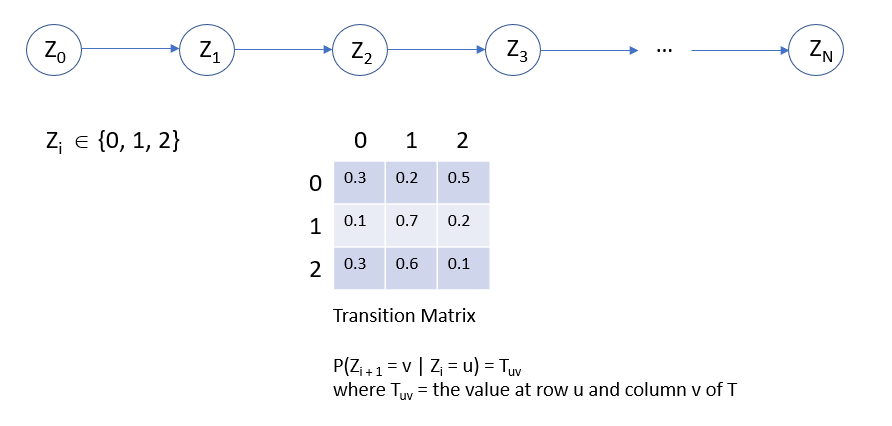

Answer the following questions.

**A.** Prove that $P(Z_{i + 1}) = \sum_{Z_i = 0}^2 P(Z_i) \ P(Z_{i+1} \mid Z_i)$ using the chain rule and principle of marginalization. [5pts]

**B.** Given the prior probabilities $P(Z_0 = 0) = 0.2$ and $P(Z_0 = 1) = 0.4$, compute the marginal probabilities $P(Z_1 = 0)$, $P(Z_1 = 1)$ and $P(Z_1 = 2)$. [5pts]

**C.** Given the same prior probabilities over $Z_0$ as in part (b), compute $P(Z_2 = 0)$, $P(Z_2 = 1)$ and $P(Z_2 = 2)$. [5pts]

**D.** Given the same prior probabilities over $Z_0$ as in part (b), compute $P(Z_3 = 0)$, $P(Z_3 = 1)$ and $P(Z_3 = 2)$. [5pts]





**SOLUTION**
A. To prove this formula, I'll use the chain rule and marginalization:
First, by the chain rule of probability:
P(Z₍ᵢ₊₁₎, Zᵢ) = P(Z₍ᵢ₊₁₎|Zᵢ) · P(Zᵢ)
Now, by the principle of marginalization, to get P(Z₍ᵢ₊₁₎), I need to sum over all possible values of Zᵢ:
P(Z₍ᵢ₊₁₎) = ∑²ₖ₌₀ P(Z₍ᵢ₊₁₎, Zᵢ=k)
Substituting the chain rule expression:
P(Z₍ᵢ₊₁₎) = ∑²ₖ₌₀ P(Z₍ᵢ₊₁₎|Zᵢ=k) · P(Zᵢ=k)
This gives us:
P(Z₍ᵢ₊₁₎) = ∑²ₖ₌₀ P(Zᵢ=k) · P(Z₍ᵢ₊₁₎|Zᵢ=k)
Which is what we needed to prove.

**SOLUTION**
B.
First, I need to determine P(Z₀=2):
P(Z₀=2) = 1 - P(Z₀=0) - P(Z₀=1) = 1 - 0.2 - 0.4 = 0.4

Now, I'll use the formula from part A to calculate the marginal probabilities for Z₁:

P(Z₁=0) = ∑²ₖ₌₀ P(Z₀=k) · P(Z₁=0|Z₀=k)

P(Z₁=0) = P(Z₀=0) · P(Z₁=0|Z₀=0) + P(Z₀=1) · P(Z₁=0|Z₀=1) + P(Z₀=2) · P(Z₁=0|Z₀=2)

P(Z₁=0) = 0.2 · 0.3 + 0.4 · 0.1 + 0.4 · 0.3

P(Z₁=0) = 0.06 + 0.04 + 0.12 = 0.22


P(Z₁=1) = ∑²ₖ₌₀ P(Z₀=k) · P(Z₁=1|Z₀=k)

P(Z₁=1) = P(Z₀=0) · P(Z₁=1|Z₀=0) + P(Z₀=1) · P(Z₁=1|Z₀=1) + P(Z₀=2) · P(Z₁=1|Z₀=2)

P(Z₁=1) = 0.2 · 0.2 + 0.4 · 0.7 + 0.4 · 0.6

P(Z₁=1) = 0.04 + 0.28 + 0.24 = 0.56

P(Z₁=2) = ∑²ₖ₌₀ P(Z₀=k) · P(Z₁=2|Z₀=k)

P(Z₁=2) = P(Z₀=0) · P(Z₁=2|Z₀=0) + P(Z₀=1) · P(Z₁=2|Z₀=1) + P(Z₀=2) · P(Z₁=2|Z₀=2)

P(Z₁=2) = 0.2 · 0.5 + 0.4 · 0.2 + 0.4 · 0.1

P(Z₁=2) = 0.1 + 0.08 + 0.04 = 0.22

**Therefore:**

**P(Z₁=0) = 0.22**

**P(Z₁=1) = 0.56**

**P(Z₁=2) = 0.22**

C Solution.
To find these probabilities, I'll use the distribution of Z₁ from part B and apply the same formula:

P(Z₂=0) = ∑²ₖ₌₀ P(Z₁=k) · P(Z₂=0|Z₁=k)

P(Z₂=0) = P(Z₁=0) · P(Z₂=0|Z₁=0) + P(Z₁=1) · P(Z₂=0|Z₁=1) + P(Z₁=2) · P(Z₂=0|Z₁=2)
P(Z₂=0) = 0.22 · 0.3 + 0.56 · 0.1 + 0.22 · 0.3
P(Z₂=0) = 0.066 + 0.056 + 0.066 = 0.188

P(Z₂=1) = ∑²ₖ₌₀ P(Z₁=k) · P(Z₂=1|Z₁=k)
P(Z₂=1) = P(Z₁=0) · P(Z₂=1|Z₁=0) + P(Z₁=1) · P(Z₂=1|Z₁=1) + P(Z₁=2) · P(Z₂=1|Z₁=2)
P(Z₂=1) = 0.22 · 0.2 + 0.56 · 0.7 + 0.22 · 0.6
P(Z₂=1) = 0.044 + 0.392 + 0.132 = 0.568

P(Z₂=2) = ∑²ₖ₌₀ P(Z₁=k) · P(Z₂=2|Z₁=k)
P(Z₂=2) = P(Z₁=0) · P(Z₂=2|Z₁=0) + P(Z₁=1) · P(Z₂=2|Z₁=1) + P(Z₁=2) · P(Z₂=2|Z₁=2)
P(Z₂=2) = 0.22 · 0.5 + 0.56 · 0.2 + 0.22 · 0.1
P(Z₂=2) = 0.11 + 0.112 + 0.022 = 0.244
Therefore:
P(Z₂=0) = 0.188
P(Z₂=1) = 0.568
P(Z₂=2) = 0.244

D. Given the same prior probabilities over Z₀, compute P(Z₃=0), P(Z₃=1) and P(Z₃=2).
Continuing from part C, I'll use the distribution of Z₂ to find Z₃:

P(Z₃=0) = ∑²ₖ₌₀ P(Z₂=k) · P(Z₃=0|Z₂=k)
P(Z₃=0) = P(Z₂=0) · P(Z₃=0|Z₂=0) + P(Z₂=1) · P(Z₃=0|Z₂=1) + P(Z₂=2) · P(Z₃=0|Z₂=2)
P(Z₃=0) = 0.188 · 0.3 + 0.568 · 0.1 + 0.244 · 0.3
P(Z₃=0) = 0.0564 + 0.0568 + 0.0732 = 0.1864

P(Z₃=1) = ∑²ₖ₌₀ P(Z₂=k) · P(Z₃=1|Z₂=k)
P(Z₃=1) = P(Z₂=0) · P(Z₃=1|Z₂=0) + P(Z₂=1) · P(Z₃=1|Z₂=1) + P(Z₂=2) · P(Z₃=1|Z₂=2)
P(Z₃=1) = 0.188 · 0.2 + 0.568 · 0.7 + 0.244 · 0.6
P(Z₃=1) = 0.0376 + 0.3976 + 0.1464 = 0.5816

P(Z₃=2) = ∑²ₖ₌₀ P(Z₂=k) · P(Z₃=2|Z₂=k)
P(Z₃=2) = P(Z₂=0) · P(Z₃=2|Z₂=0) + P(Z₂=1) · P(Z₃=2|Z₂=1) + P(Z₂=2) · P(Z₃=2|Z₂=2)
P(Z₃=2) = 0.188 · 0.5 + 0.568 · 0.2 + 0.244 · 0.1
P(Z₃=2) = 0.094 + 0.1136 + 0.0244 = 0.232

**Therefore:**

P(Z₃=0) = 0.1864

P(Z₃=1) = 0.5816

P(Z₃=2) = 0.232


**PROBLEM 3** [10pts]

Consider the first-order Markov chain in Problem 2 and suppose we have $3$ actions to choose: (1) initializing $Z_0 = 0$; (2) initializing $Z_0 = 1$; and (3) initializing $Z_0 = 2$. Once a decision is made, the Markov chain will simulate forward $2$ steps and stop at a certain (random) state $Z_2$. Answer the following questions.

**A.** Suppose that we will be awarded with $5$, $8$ and $10$ units if at the end of the Markov chain simulation, $Z_2 = 0$, $Z_2 = 1$ and $Z_2 = 2$ respectively. Compute the expected reward of each action above. [5pts]

**B.** Instead of the above $3$ actions, suppose we are only given $2$ actions A and B.

Executing A changes the prior probabilities over $Z_0$ to $(P(Z_0 = 0) = 0.1, P(Z_0 = 1) = 0.9)$.

Executing B changes the prior probabilities over $Z_0$ to $(P(Z_0 = 0) = 0.3, P(Z_0 = 2) = 0.7)$.

Given the above, compute the expected reward of A and B. Which one is better? Explain. A simple Yes/No answer with no explanation will not be graded.






**SOLUTION**
I need to calculate the expected reward for each initialization action by determining the probabilities of ending at each possible Z₂ state, then multiplying by the corresponding rewards.
Action (1): Initialize Z₀ = 0

First, I'll find the probabilities of Z₂ given Z₀ = 0:
For P(Z₂ = 0 | Z₀ = 0):

Z₀ = 0 → Z₁ = 0 → Z₂ = 0: P(Z₁ = 0|Z₀ = 0) × P(Z₂ = 0|Z₁ = 0) = 0.3 × 0.3 = 0.09
Z₀ = 0 → Z₁ = 1 → Z₂ = 0: P(Z₁ = 1|Z₀ = 0) × P(Z₂ = 0|Z₁ = 1) = 0.2 × 0.1 = 0.02
Z₀ = 0 → Z₁ = 2 → Z₂ = 0: P(Z₁ = 2|Z₀ = 0) × P(Z₂ = 0|Z₁ = 2) = 0.5 × 0.3 = 0.15

P(Z₂ = 0 | Z₀ = 0) = 0.09 + 0.02 + 0.15 = 0.26

For P(Z₂ = 1 | Z₀ = 0):

Z₀ = 0 → Z₁ = 0 → Z₂ = 1: P(Z₁ = 0|Z₀ = 0) × P(Z₂ = 1|Z₁ = 0) = 0.3 × 0.2 = 0.06
Z₀ = 0 → Z₁ = 1 → Z₂ = 1: P(Z₁ = 1|Z₀ = 0) × P(Z₂ = 1|Z₁ = 1) = 0.2 × 0.7 = 0.14
Z₀ = 0 → Z₁ = 2 → Z₂ = 1: P(Z₁ = 2|Z₀ = 0) × P(Z₂ = 1|Z₁ = 2) = 0.5 × 0.6 = 0.30

P(Z₂ = 1 | Z₀ = 0) = 0.06 + 0.14 + 0.30 = 0.50
For P(Z₂ = 2 | Z₀ = 0):

Z₀ = 0 → Z₁ = 0 → Z₂ = 2: P(Z₁ = 0|Z₀ = 0) × P(Z₂ = 2|Z₁ = 0) = 0.3 × 0.5 = 0.15
Z₀ = 0 → Z₁ = 1 → Z₂ = 2: P(Z₁ = 1|Z₀ = 0) × P(Z₂ = 2|Z₁ = 1) = 0.2 × 0.2 = 0.04
Z₀ = 0 → Z₁ = 2 → Z₂ = 2: P(Z₁ = 2|Z₀ = 0) × P(Z₂ = 2|Z₁ = 2) = 0.5 × 0.1 = 0.05

P(Z₂ = 2 | Z₀ = 0) = 0.15 + 0.04 + 0.05 = 0.24

Expected reward for Action (1):

E[Reward|Z₀=0] = 5 × P(Z₂=0|Z₀=0) + 8 × P(Z₂=1|Z₀=0) + 10 × P(Z₂=2|Z₀=0)

E[Reward|Z₀=0] = 5 × 0.26 + 8 × 0.50 + 10 × 0.24

E[Reward|Z₀=0] = 1.30 + 4.00 + 2.40 = 7.70

Action (2): Initialize Z₀ = 1
Following the same approach:
For P(Z₂ = 0 | Z₀ = 1):

Z₀ = 1 → Z₁ = 0 → Z₂ = 0: P(Z₁ = 0|Z₀ = 1) × P(Z₂ = 0|Z₁ = 0) = 0.1 × 0.3 = 0.03
Z₀ = 1 → Z₁ = 1 → Z₂ = 0: P(Z₁ = 1|Z₀ = 1) × P(Z₂ = 0|Z₁ = 1) = 0.7 × 0.1 = 0.07
Z₀ = 1 → Z₁ = 2 → Z₂ = 0: P(Z₁ = 2|Z₀ = 1) × P(Z₂ = 0|Z₁ = 2) = 0.2 × 0.3 = 0.06

P(Z₂ = 0 | Z₀ = 1) = 0.03 + 0.07 + 0.06 = 0.16
For P(Z₂ = 1 | Z₀ = 1):

Z₀ = 1 → Z₁ = 0 → Z₂ = 1: P(Z₁ = 0|Z₀ = 1) × P(Z₂ = 1|Z₁ = 0) = 0.1 × 0.2 = 0.02
Z₀ = 1 → Z₁ = 1 → Z₂ = 1: P(Z₁ = 1|Z₀ = 1) × P(Z₂ = 1|Z₁ = 1) = 0.7 × 0.7 = 0.49
Z₀ = 1 → Z₁ = 2 → Z₂ = 1: P(Z₁ = 2|Z₀ = 1) × P(Z₂ = 1|Z₁ = 2) = 0.2 × 0.6 = 0.12

P(Z₂ = 1 | Z₀ = 1) = 0.02 + 0.49 + 0.12 = 0.63
For P(Z₂ = 2 | Z₀ = 1):

Z₀ = 1 → Z₁ = 0 → Z₂ = 2: P(Z₁ = 0|Z₀ = 1) × P(Z₂ = 2|Z₁ = 0) = 0.1 × 0.5 = 0.05
Z₀ = 1 → Z₁ = 1 → Z₂ = 2: P(Z₁ = 1|Z₀ = 1) × P(Z₂ = 2|Z₁ = 1) = 0.7 × 0.2 = 0.14
Z₀ = 1 → Z₁ = 2 → Z₂ = 2: P(Z₁ = 2|Z₀ = 1) × P(Z₂ = 2|Z₁ = 2) = 0.2 × 0.1 = 0.02

P(Z₂ = 2 | Z₀ = 1) = 0.05 + 0.14 + 0.02 = 0.21

Expected reward for Action (2):

E[Reward|Z₀=1] = 5 × P(Z₂=0|Z₀=1) + 8 × P(Z₂=1|Z₀=1) + 10 × P(Z₂=2|Z₀=1)

E[Reward|Z₀=1] = 5 × 0.16 + 8 × 0.63 + 10 × 0.21

E[Reward|Z₀=1] = 0.80 + 5.04 + 2.10 = 7.94

Action (3): Initialize Z₀ = 2
For P(Z₂ = 0 | Z₀ = 2):

Z₀ = 2 → Z₁ = 0 → Z₂ = 0: P(Z₁ = 0|Z₀ = 2) × P(Z₂ = 0|Z₁ = 0) = 0.3 × 0.3 = 0.09
Z₀ = 2 → Z₁ = 1 → Z₂ = 0: P(Z₁ = 1|Z₀ = 2) × P(Z₂ = 0|Z₁ = 1) = 0.6 × 0.1 = 0.06
Z₀ = 2 → Z₁ = 2 → Z₂ = 0: P(Z₁ = 2|Z₀ = 2) × P(Z₂ = 0|Z₁ = 2) = 0.1 × 0.3 = 0.03

P(Z₂ = 0 | Z₀ = 2) = 0.09 + 0.06 + 0.03 = 0.18
For P(Z₂ = 1 | Z₀ = 2):

Z₀ = 2 → Z₁ = 0 → Z₂ = 1: P(Z₁ = 0|Z₀ = 2) × P(Z₂ = 1|Z₁ = 0) = 0.3 × 0.2 = 0.06
Z₀ = 2 → Z₁ = 1 → Z₂ = 1: P(Z₁ = 1|Z₀ = 2) × P(Z₂ = 1|Z₁ = 1) = 0.6 × 0.7 = 0.42
Z₀ = 2 → Z₁ = 2 → Z₂ = 1: P(Z₁ = 2|Z₀ = 2) × P(Z₂ = 1|Z₁ = 2) = 0.1 × 0.6 = 0.06

P(Z₂ = 1 | Z₀ = 2) = 0.06 + 0.42 + 0.06 = 0.54
For P(Z₂ = 2 | Z₀ = 2):

Z₀ = 2 → Z₁ = 0 → Z₂ = 2: P(Z₁ = 0|Z₀ = 2) × P(Z₂ = 2|Z₁ = 0) = 0.3 × 0.5 = 0.15
Z₀ = 2 → Z₁ = 1 → Z₂ = 2: P(Z₁ = 1|Z₀ = 2) × P(Z₂ = 2|Z₁ = 1) = 0.6 × 0.2 = 0.12
Z₀ = 2 → Z₁ = 2 → Z₂ = 2: P(Z₁ = 2|Z₀ = 2) × P(Z₂ = 2|Z₁ = 2) = 0.1 × 0.1 = 0.01

P(Z₂ = 2 | Z₀ = 2) = 0.15 + 0.12 + 0.01 = 0.28

Expected reward for Action (3):

E[Reward|Z₀=2] = 5 × P(Z₂=0|Z₀=2) + 8 × P(Z₂=1|Z₀=2) + 10 × P(Z₂=2|Z₀=2)

E[Reward|Z₀=2] = 5 × 0.18 + 8 × 0.54 + 10 × 0.28

E[Reward|Z₀=2] = 0.90 + 4.32 + 2.80 = 8.02
Therefore, the expected rewards are:

Action (1): 7.70 units
Action (2): 7.94 units
Action (3): 8.02 units

**PROBLEM 4** [25pts]

The loan department of a bank has the following past loan processing records, each of which contains an applicant's income, credit history, debt and the final approval decision. These records can serve as training examples to build a decision-making software for a loan advisory system.

| ID | Income   | Credit History | Debt | Decision |
|----|----------|----------------|------|----------|
| 1  | 0-5K     | Bad            | Low  | Reject   |
| 2  | 0-5K     | Good           | Low  | Approve  |
| 3  | 0-5K     | Unknown        | High | Reject   |
| 4  | 0-5K     | Unknown        | Low  | Approve  |
| 5  | 0-5K     | Unknown        | Low  | Approve  |
| 6  | 0-5K     | Unknown        | Low  | Reject   |
| 7  | 5-10K    | Bad            | Low  | Reject   |
| 8  | 5-10K    | Good           | High | Approve  |
| 9  | 5-10K    | Unknown        | High | Approve  |
| 10 | Over 10K | Unknown        | High | Approve  |
| 11 | Over 10K | Bad            | Low  | Reject   |
| 12 | Over 10K | Good           | Low  | Approve  |

We will build a Naive Bayes classifier in this question.

Recall that Naive Bayes inference is based on computing $P(\mathrm{Cause} | \mathrm{Effect}_1, \mathrm{Effect}_2, \mathrm{Effect}_3)$ while assuming that:

**(1)** $\mathrm{Effect}_1, \mathrm{Effect}_2$ and $\mathrm{Effect}_3$ are conditionally independent given $\mathrm{Cause}$; and

**(2)** $P(\mathrm{Effect}_i \mid \mathrm{Cause})$ is given for each effect $\mathrm{Effect}_i$ as well as $P(\mathrm{Cause})$.

To apply Naive Bayes inference here, we can set $\mathrm{Cause} = \mathrm{Decision}$, $\mathrm{Effect}_1 = \mathrm{Income}$, $\mathrm{Effect}_2 = \mathrm{Credit\  History}$ and $\mathrm{Effect}_3 = \mathrm{Debt}$. However, we are not explicitly provided $P(\mathrm{Effect}_i \mid \mathrm{Cause})$ and $P(\mathrm{Cause})$.

So we need to estimate these probabilities from the data. Given the above context, please answer the following questions.

**A.** Estimate $P(\mathrm{Cause} = \mathrm{Approve})$ = (no. of approved cases / no. of cases) and $P(\mathrm{Cause} = \mathrm{Reject})$ = (no. of rejected cases / no. of cases) from the data. [5pts]

**B.** Estimate $P(\mathrm{Income} = u \mid \mathrm{Decision} = \mathrm{Approve})$ = no. of approved cases where ($\mathrm{Income} = u$) / no. of approved cases; and $P(\mathrm{Income} = u \mid \mathrm{Decision} = \mathrm{Reject})$ = no. of rejected cases where ($\mathrm{Income} = u$) / no. of rejected cases. Do that for each value of $u \in \{$0$-$5$\mathrm{K},\ $5$-$10$\mathrm{K},\  \mathrm{Over } $10$\mathrm{K}\}$. [5pts]

**C.** Estimate $P(\mathrm{Credit\ History} = u \mid \mathrm{Decision} = \mathrm{Approve})$ = no. of approved cases where ($\mathrm{Credit\ History} = u$) / no. of approved cases; and $P(\mathrm{Credit\ History} = u \mid \mathrm{Decision} = \mathrm{Reject})$ = no. of rejected cases where ($\mathrm{Credit\ History} = u$) / no. of rejected cases. Do that for each value of $u \in \{\mathrm{Bad},\ \mathrm{Good},\  \mathrm{Unknown}\}$. [5pts]

**D.** Estimate $P(\mathrm{Debt} = u \mid \mathrm{Decision} = \mathrm{Approve})$ = no. of approved cases where ($\mathrm{Debt} = u$) / no. of approved cases; and $P(\mathrm{Debt} = u \mid \mathrm{Decision} = \mathrm{Reject})$ = no. of rejected cases where ($\mathrm{Debt} = u$) / no. of rejected cases. Do that for each value of $u \in \{\mathrm{Low},\ \mathrm{High}\}$. [5pts]

**E.** What is the Naive Bayes decision for an applicant who has $4\mathrm{K}$ annual income, a good credit and a high amount of debt? [5pts]


**SOLUTION**

A. Estimating P(Cause)
Total number of cases = 12
Number of approved cases = 7
Number of rejected cases = 5
P(Cause=Approve) = 7/12 = 0.583
P(Cause=Reject) = 5/12 = 0.417
B. Estimating P(Income=u|Decision)
For P(Income=u|Decision=Approve):

P(Income=0-5K|Approve) = 3/7 = 0.429
P(Income=5-10K|Approve) = 2/7 = 0.286
P(Income=Over 10K|Approve) = 2/7 = 0.286

For P(Income=u|Decision=Reject):

P(Income=0-5K|Reject) = 3/5 = 0.6
P(Income=5-10K|Reject) = 1/5 = 0.2
P(Income=Over 10K|Reject) = 1/5 = 0.2

C. Estimating P(Credit History=u|Decision)
For P(Credit History=u|Decision=Approve):

P(Credit History=Bad|Approve) = 0/7 = 0
P(Credit History=Good|Approve) = 3/7 = 0.429
P(Credit History=Unknown|Approve) = 4/7 = 0.571

For P(Credit History=u|Decision=Reject):

P(Credit History=Bad|Reject) = 3/5 = 0.6
P(Credit History=Good|Reject) = 0/5 = 0
P(Credit History=Unknown|Reject) = 2/5 = 0.4

D. Estimating P(Debt=u|Decision)
For P(Debt=u|Decision=Approve):

P(Debt=Low|Approve) = 4/7 = 0.571
P(Debt=High|Approve) = 3/7 = 0.429

For P(Debt=u|Decision=Reject):

P(Debt=Low|Reject) = 3/5 = 0.6
P(Debt=High|Reject) = 2/5 = 0.4

E. Naive Bayes Decision for New Applicant
For an applicant with:

Income = 4K (falls in the 0-5K category)
Credit History = Good
Debt = High

We need to calculate:
P(Approve|Income=0-5K, Credit=Good, Debt=High) and
P(Reject|Income=0-5K, Credit=Good, Debt=High)
Using Bayes' theorem with the naive independence assumption:
P(Approve|Income, Credit, Debt) ∝ P(Approve) × P(Income|Approve) × P(Credit|Approve) × P(Debt|Approve)
P(Reject|Income, Credit, Debt) ∝ P(Reject) × P(Income|Reject) × P(Credit|Reject) × P(Debt|Reject)
For Approve:
P(Approve) × P(Income=0-5K|Approve) × P(Credit=Good|Approve) × P(Debt=High|Approve)
= 0.583 × 0.429 × 0.429 × 0.429 = 0.0461
For Reject:
P(Reject) × P(Income=0-5K|Reject) × P(Credit=Good|Reject) × P(Debt=High|Reject)
= 0.417 × 0.6 × 0 × 0.4 = 0
Since P(Credit=Good|Reject) = 0, the probability of rejection becomes zero. This is because in our training data, there are no examples where someone with good credit was rejected.

Since the probability for Approve (0.0461) is greater than the probability for Reject (0), the Naive Bayes decision would be to Approve the loan for this applicant.

**PROBLEM 5** [20pts]

We will now attempt to implement a Naive Bayes classifier (NBC) to solve a more practical task of spam filtering.

In this task, we are given a dataset containing a number of e-mail. Each e-mail is characterized by a string containing its text content, which is labeled with either "ham" or "spam" where the latter indicates that the e-mail is a spam.

You can download this dataset from the assignment statement on Canvas.

--

To implement NBC, we will first need to decide on a set of features to characterize an e-mail. One approach is to use English words (or tokens) as features. Each e-mail text can then be represented as a multi-hot vector whose dimension is the no. of (distinct) English words.

Hence, suppose there are n words/tokens, each e-mail can be represented as a set of variables $X_1, X_2, \ldots, X_n$ where $X_i = 0$ if the $i$-th word is not present in the e-mail. Otherwise, $X_i = 1$. Likewise, the label of each e-mail $Y = 0$ if it is a normal e-mail. Otherwise, $Y = 1$.

Your implementation of the NBC must therefore do the followings:

**1.** Decide on the list of words which will be used as features. A few example considerations are: feature word must occur at least once, feature word must be informative, e.g., words such as "a", "an", "the" are not informative.

**2.** Estimate $P(X_i \mid Y)$ given the dataset of example e-mails. This is the part where you "fit" the NBC. A manual example has been provided to you in Problem 4.

**3.** Given an unseen e-mail (not in the dataset), extract its (input) representation $X_1, X_2, \ldots, X_n$, compute P(Y \mid X_1, X_2, \ldots, X_n) based on the result of step **2.** above, and return the most likely label $Y$. This is the part where the fitted NBC is used for making prediction.


For step **1**, you are provided with the following code to remove "uninformative" words

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
import string

import nltk
nltk.download('stopwords')

def clean_util(text):  # the input to this function is a raw e-mail text
    punc_rmv = [char for char in text if char not in string.punctuation]
    punc_rmv = "".join(punc_rmv)
    stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopwords.words('english')]
    return " ".join(stopword_rmv)

## FILL IN YOUR DATA LOADER & PRE-PROCESSING CODE HERE TO COMPLETE STEP 1
## AT THE END OF THIS, YOU SHOULD HAVE THE DATA PACKAGED INTO TRAIN (X_train, Y_train) AND TEST (X_test, Y_test) PARTITIONS AT THE 80/20 RATIO
## YOUR NBC WILL BE FITTED USING (X_train, Y_train) AND TESTED ON (X_test, Y_test)

## X_train, X_test WILL BE NUMPY MATRICES WITH SIZES (n_train_samples by n_features) AND (n_test_samples by n_features)
## y_train, y_test WILL BE NUMPY MATRICES WITH SIZES (n_train_samples by 1) AND (n_test_samples by 1)

# --- Cell 2 --------------------------------------------------
df = pd.read_csv("spam_ham.csv")[["text", "label_num"]]
df.columns = ["text", "label"]          # 0 = ham, 1 = spam

# Each column after vectorising is a **word feature** (n ≈ 22 k)
vectorizer = CountVectorizer(
    preprocessor=clean_util,
    binary=True,        # Bernoulli 0/1
    min_df=3,           # ignore ultra-rare words
    max_df=0.90         # ignore super-common ones
)
X = vectorizer.fit_transform(df["text"])
y = df["label"].to_numpy()

# Save the original row indices before splitting
indices = np.arange(len(df))

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.20, random_state=42, stratify=y)

print("✅ data split:", X_train.shape, X_test.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ data split: (4136, 14091) (1035, 14091)


For step **2** and step **3**, you are to substantiate the following NBC class

In [15]:
class NBC:
    def __init__(self, params=None):  # IT IS UP TO YOU TO DECIDE HOW TO INTERPRET AND UNPACK PARAMS
        self.params = params  # IT CAN BE NONE OR IT CAN BE SOME OTHER HYPER-PARAMETERS YOU NEED FOR THE FITTING CODE -- THIS DEPENDS ON YOUR FEATURIZATION DESIGN
        self.class_priors = None
        self.feature_probs = None

    def fit(self, X_train, y_train):
        y_train = y_train.ravel()

        n_samples, n_features = X_train.shape
        self.class_priors = {}
        self.feature_probs = {}

        self.class_priors[0] = np.mean(y_train == 0)
        self.class_priors[1] = np.mean(y_train == 1)

        self.feature_probs = {
            0: np.asarray((X_train[y_train == 0].sum(axis=0) + 1) / (np.sum(y_train == 0) + 2)).ravel(),
            1: np.asarray((X_train[y_train == 1].sum(axis=0) + 1) / (np.sum(y_train == 1) + 2)).ravel(),
        }


        return self

        # Laplace smoothing added (+1 in numerator, +2 in denominator)

    def predict(self, X_test):
        # Convert sparse matrix to dense NumPy array
        X = X_test.toarray()

        # Get log probabilities
        log_prob_0 = np.log(self.feature_probs[0])
        log_prob_1 = np.log(self.feature_probs[1])
        log_inv_prob_0 = np.log(1 - self.feature_probs[0])
        log_inv_prob_1 = np.log(1 - self.feature_probs[1])

        # Log priors
        log_prior_0 = np.log(self.class_priors[0])
        log_prior_1 = np.log(self.class_priors[1])

        # Vectorized computation for all test samples
        log_likelihood_0 = X @ log_prob_0 + (1 - X) @ log_inv_prob_0
        log_likelihood_1 = X @ log_prob_1 + (1 - X) @ log_inv_prob_1

        total_log_0 = log_prior_0 + log_likelihood_0
        total_log_1 = log_prior_1 + log_likelihood_1

        return (total_log_1 > total_log_0).astype(int)




def evaluate(self, NBC, X_test, y_test): # SEE THE DEFINITION OF X_test, y_test ABOVE
    ## FILL IN YOUR IMPLEMENTATION OF THE EVALUATION CODE ##
    ## THIS IS SUPPOSED TO RETURN THE A NUMBER BETWEEN 0 and 1 INDICATING THE ACC OF THE FITTED NBC ON THE (X_test, y_test) DATA
    y_pred = self.predict(X_test)
    acc = np.mean(y_pred == y_test)
    return acc
    return 0.0  # 0.0 means zero acc while 1.0 means perfect acc

# Train the model
model = NBC().fit(X_train, y_train)

# Call the official evaluate function
acc = evaluate(model, None, X_test, y_test)
print("Test accuracy =", acc)

# Inspect first five test e-mails
sample_emails   = X_test[:5]
true_labels     = y_test[:5]
predicted_labels = model.predict(sample_emails)

for i in range(5):
    print(f"Email {i+1}: true={true_labels[i]}, predicted={predicted_labels[i]}")

# --- Cell 5 ----------------------------------------
for i in range(5):
    print("\n------- Email", i + 1, "-------")
    print(df.loc[idx_test[i], "text"][:250], "…")
    print("True:", y_test[i], "| Predicted:", model.predict(X_test[i])[0])


# Show first 5 spam-labeled emails
for i in range(len(y_test)):
    if y_test[i] == 1:
        pred = model.predict(X_test[i])[0]
        print(f"\nSpam email {i+1}:")
        print(df.loc[idx_test[i], "text"][:300])
        print("True:", y_test[i], "| Predicted:", pred)
        break  # remove this to see more



Test accuracy = 0.8975845410628019
Email 1: true=0, predicted=0
Email 2: true=0, predicted=0
Email 3: true=0, predicted=0
Email 4: true=0, predicted=0
Email 5: true=0, predicted=0

------- Email 1 -------
Subject: final cp name change and merger report 08 / 00
just to clarify , i was in the february 2000 report in error when i sent the
report out to everyone . please notice at the bottom of the report that there
is a worksheet tab for august 2000 a …
True: 0 | Predicted: 0

------- Email 2 -------
Subject: calpine daily gas nomination
- hidalgo daily gas nomination . doc …
True: 0 | Predicted: 0

------- Email 3 -------
Subject: calpine daily gas nomination
>
aimee , i will be out of the office friday and monday . in my absence please
call aron childers at 713 - 830 - 8811 if you have any questions . thanks .
ricky a . archer
fuel supply
700 louisiana , suite  …
True: 0 | Predicted: 0

------- Email 4 -------
Subject: wells
daren , i think i may have lost my mind ( no comment vance ) b

**Important notes:**

**1.** For step **1**, feel free to use any existing text preprocessing workflow of scikit-learn.

**2.** For step **2** and **3**, you are expected to implement NBC from scratch. If you call the default NBC from scikit-learn or any other libraries, your submission will be voided. You are NOT allowed to change the above function signatures but you are allowed to add extra functions to the NBC class.

**3.** Please also do NOT attempt to "work around" the above rules. Unless you really implement NBC from scratch, any "work around" will result in a zero score.

In [10]:
import pandas as pd

df = pd.read_csv("spam_ham.csv")
print("Column names:", df.columns.tolist())
df.head()


Column names: ['Unnamed: 0', 'label', 'text', 'label_num']


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
